In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ("24-medical_cost.csv")

In [3]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


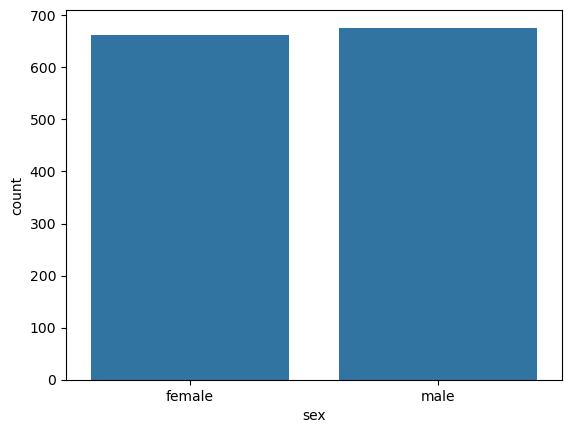

In [7]:
sns.countplot (data=df, x="sex")
plt.show()

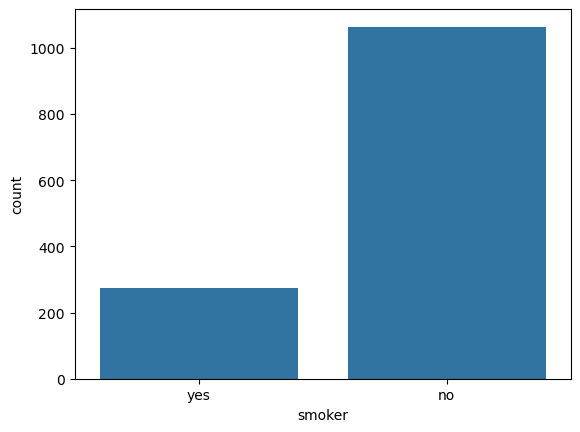

In [8]:
sns.countplot (data=df, x="smoker")
plt.show()

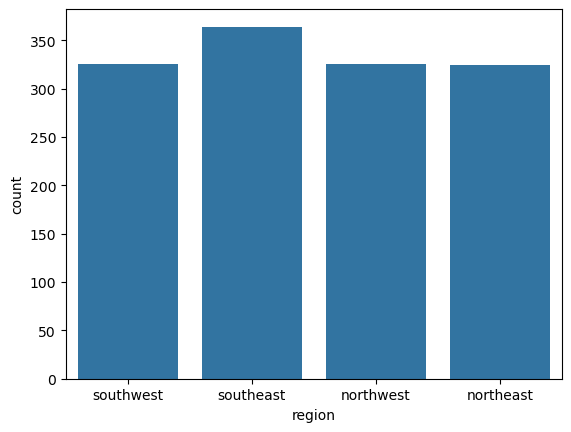

In [9]:
sns.countplot (data=df, x="region")
plt.show()

In [10]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


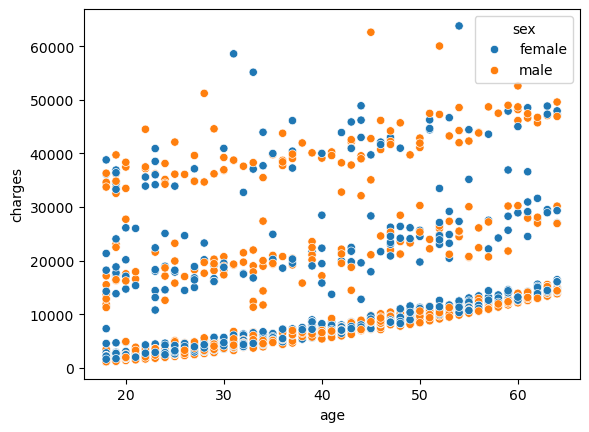

In [11]:
sns.scatterplot (data=df, x="age",y="charges",hue ="sex")
plt.show()

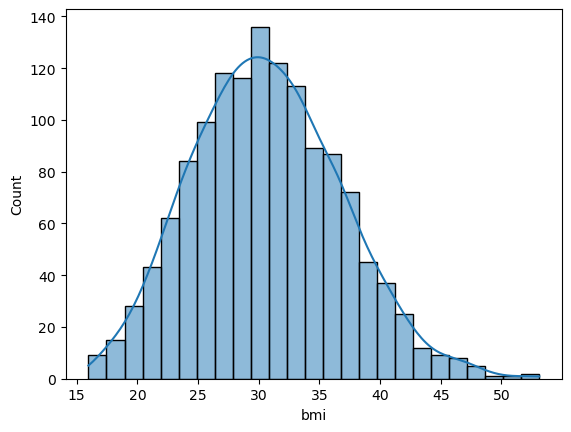

In [12]:
sns.histplot (data=df, x="bmi",kde= True)
plt.show()

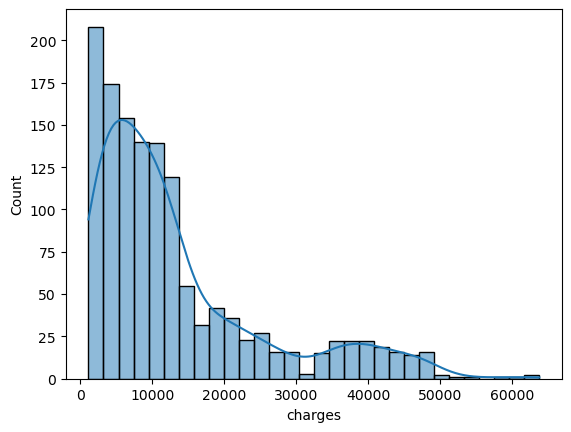

In [13]:
sns.histplot (data=df, x="charges",kde= True)
plt.show()

In [14]:
df["sex"] = df["sex"].map({"male" : 0, "female": 1})
df["smoker"] = df["smoker"].map({"no" : 0, "yes": 1})

In [15]:
df["sex"].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [16]:

df["smoker"].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [17]:
df["sex"].isna().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 83.8+ KB


In [43]:
#one-hot encoding

In [45]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=15)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_cols = ["region"]

preprocessor = ColumnTransformer(transformers=
                                [
                                    ('cat', OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
                                ], remainder= "passthrough"
                                )

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)